## Prediction using Supervised ML
### Simple Linear Regression Problem

In [1]:
# Libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Libraries for Model Implementation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Model Evolution
from sklearn.metrics import mean_absolute_error

In [2]:
warnings.filterwarnings("ignore")
URL = "http://bit.ly/w-data"
df = pd.read_csv(URL)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Checking for basic info about data and null values in rows 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [4]:
# Checking for Duplicates in dataset
df.duplicated().sum()

0

In [5]:
# Statistical Summary of dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


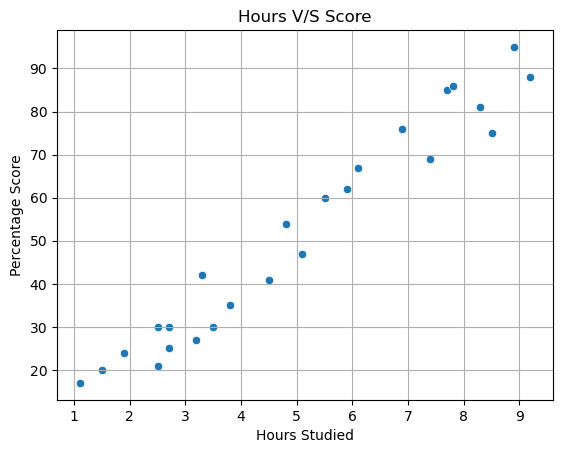

In [6]:
# Plotting the distribution
fig,axes = plt.subplots()
sns.scatterplot(x= df['Hours'],y=df['Scores'])
plt.grid()
axes.set(xlabel='Hours Studied',ylabel = 'Percentage Score')
plt.title('Hours V/S Score')
plt.show()

In [7]:
# Data Preparation
X = df.drop('Scores',axis = 1)
Y = df['Scores']

In [8]:
np.random.seed(42)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.15 , random_state = 42)

In [9]:
# Model Training(default hyperparameters)
LR_model = LinearRegression()
LR_model.fit(X_train,Y_train)

LinearRegression()

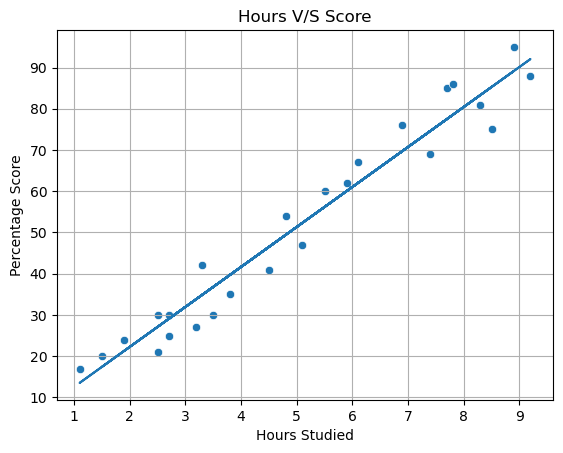

In [10]:
# Plotting the regression line
Y_axis = LR_model.coef_ * X + LR_model.intercept_
fig,axes = plt.subplots()
sns.scatterplot(x= df['Hours'],y=df['Scores'],ax = axes)
plt.plot(X,Y_axis)
plt.grid()
axes.set(xlabel='Hours Studied',ylabel = 'Percentage Score')
plt.title('Hours V/S Score')
plt.show()

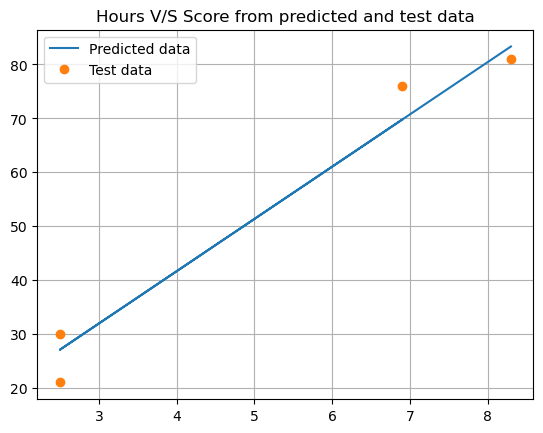

In [11]:
# making prediction
Y_predict = LR_model.predict(X_test)
plt.plot(X_test,Y_predict,label = 'Predicted data')
plt.plot(X_test,Y_test,'o',label = 'Test data')
plt.grid()
plt.legend()
plt.title('Hours V/S Score from predicted and test data')
plt.show()

In [12]:
# Evaluation Of model
print(f"Mean Absolute Error : {mean_absolute_error(Y_test,Y_predict)}")

Mean Absolute Error : 4.393821175688238


**Question** : What will be predicted score if a student studies for 9.25 hrs/day?

In [21]:
hrs = pd.Series([9.25]).values.reshape(-1, 1)

predicted_score = LR_model.predict(hrs)
print(f"{round(predicted_score[0],2)} percentage  will be the predicted percentage if a student studies for 9.25 hrs/day.")

92.55 percentage  will be the predicted percentage if a student studies for 9.25 hrs/day.


****

**Linear Regression from scratch :**

In [20]:
def Linear_reg(X,Y):
    X_x =np.array(X)
    Y_x = np.array(Y)
    Y_y = np.dot(X_x.T,X_x)
    coefficient = np.dot(np.linalg.inv(Y_y),np.dot(X_x.T,Y_x))
    return coefficient
coefficient = Linear_reg(X_train,Y_train) 
print(f"{np.round(coefficient*hrs,2)} percentage will be the predicted percentage  if a student studies for 9.25 hrs/day.")



[[93.95]] percentage will be the predicted percentage  if a student studies for 9.25 hrs/day.
